# LAB ASSIGNMENT 4: SUPPORT VECTOR MACHINES

### Introduction to Computational Models (Dpto. de Informática y Análisis Numérico) -- EPSC (UCO)
## Academic year 2020/21

### By Álvaro Prieto Barón (i72prbaa@uco.es) DNI: 49506913B

In [28]:
import libsvm_param

## Question 1: Explain the contents and result of `libsvm.py`

The file contains the code needed to train an SVM and plot its result. It uses a lineal kernel, and has a regularization strenght proportional to 1/1000 (as it is inversely proportional to the `C` parameter).

To better control the parameters of the calls, we create a function in another file(`libsvm_param.py` that runs a parametrized version of the same code.

When we run it, we obtain the following result:

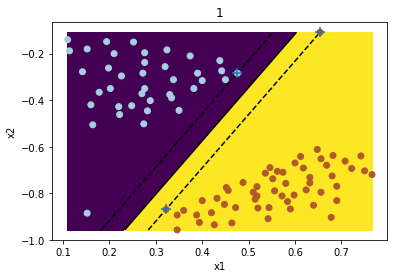

In [2]:
libsvm_param.run()

In this plot, we can see several things:
- The red and blue dots are the patterns of the dataset, with the color representing the class.
- The points marked with a `+` are the support vectors of the model.
- The lines are the separating hyperplane(continuous) and margin(dotted)
- The colored areas are the regions associated with each class.

## Question 2: Which hyperplane will make less mistake(intuitively)

An hyperplane that passes close to the two points that are separated from the rest, even if it misclassifies one of them as they are probably outliers or noise, so it gets better at generalising.

## Question 3: Use different values of C and compare the results

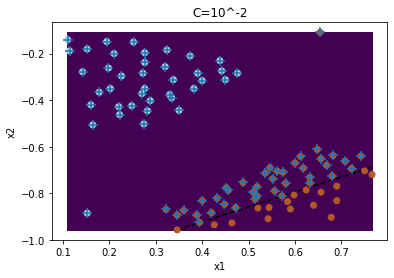

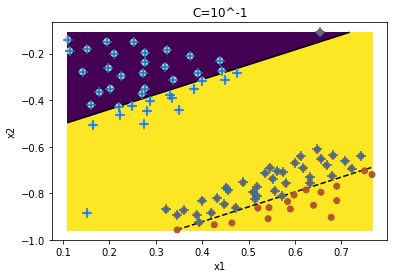

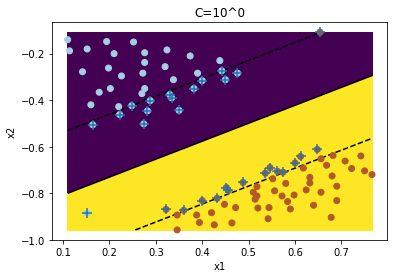

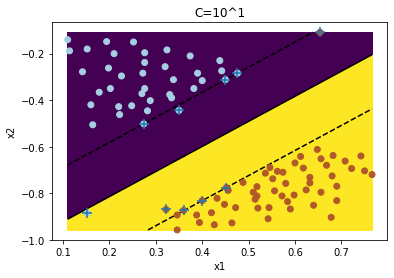

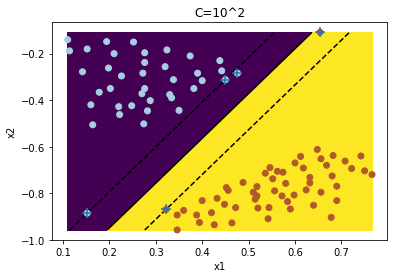

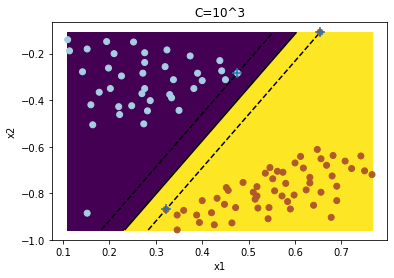

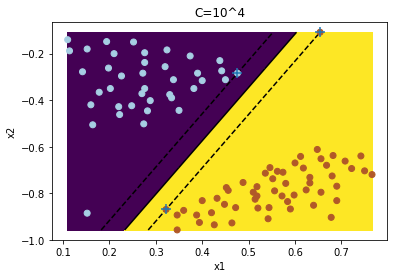

In [3]:
for exp in range (-2, 5):
    libsvm_param.run(c=10**exp, fig_name=f"C=10^{exp}")

As we can see, for very low values of C, the model tries to have a very big margin, making a lot of mistakes in the process, while for very high values, it is more accurate, but has smaller margins. The best value for C is around 100, which produces no errors and has a bigger margin. Lower values have too many errors, and higher ones have practically the same accuracy but less margin.

## Question 4: Do the same for the second dataset and comment the results.

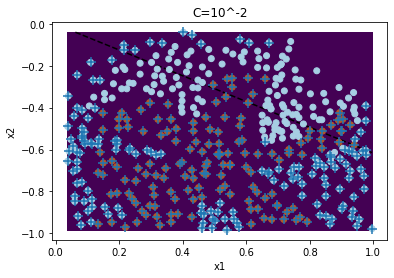

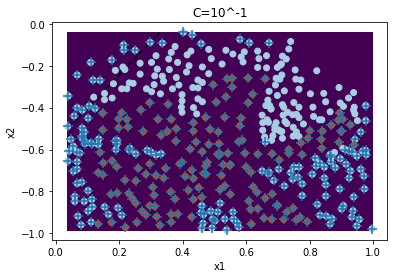

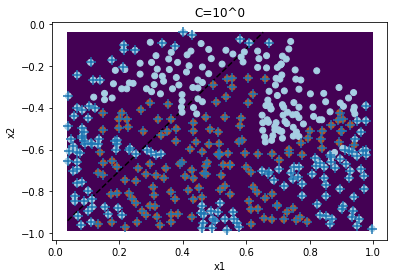

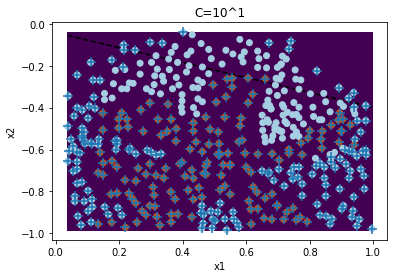

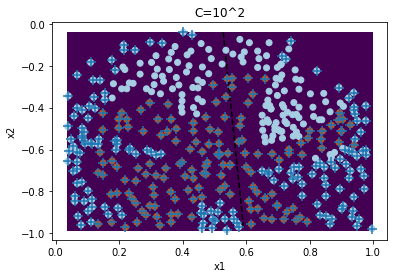

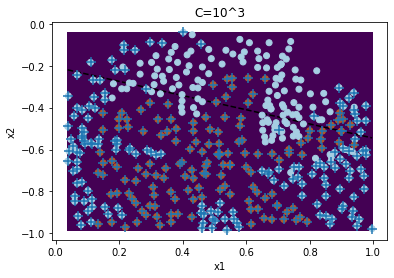

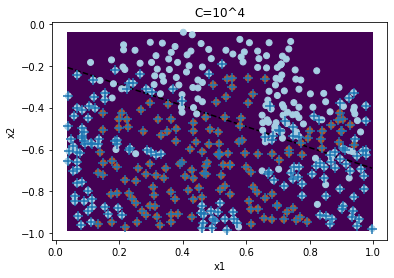

In [4]:
for exp in range (-2, 5):
    libsvm_param.run(c=10**exp, fig_name=f"C=10^{exp}", dataset="Datasets/csv/dataset2.csv")


We don't get any particularly good results, as the data is not linearly separable in any way.

## Question 5: Proposing a solution for dataset2 with a Gaussian kernel

```python
for c_exp in range (-2, 5):
    for g_exp in range (-2, 5):
        libsvm_param.run_gaussian(c=10**c_exp, gamma=10**g_exp,fig_name=f"C=10^{c_exp}, gamma=10^{g_exp}", dataset="Datasets/csv/dataset2.csv")
```

The code above runs a new function, called `run_gaussian` to train and plot SVMs with all the possible combinations of C and $\gamma$. After running it (full output not included to save space), we can confirm that the best possible configuration is C $=10^4$, $\gamma=10$. Its output is:

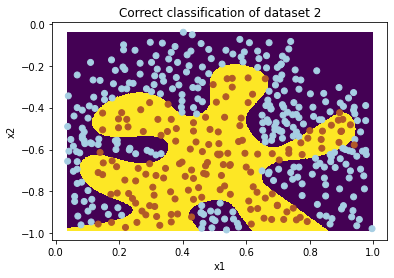

In [5]:
libsvm_param.run_gaussian(c=10**4, gamma=10, fig_name="Correct classification of dataset 2", dataset="Datasets/csv/dataset2.csv")

We can check some of the other configurations, some of them produce overfitting, like C $=10^4$, $\gamma=10^3$ (mild) and C $=10^4$, $\gamma=10^4$ (severe). In the severe case, we can observe that the SVM learns the red patterns so well that the only area it assigns to them is almost a single point. This is because for large values of $\gamma$, the radius becomes smaller and smaller(in the case of $\gamma=10^4$, $r\approx.007$), which produces overfitting.

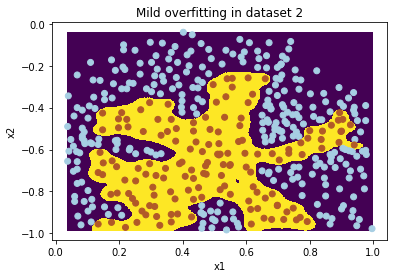

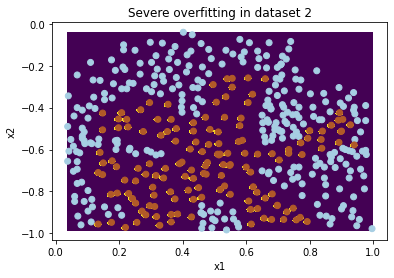

In [6]:
libsvm_param.run_gaussian(c=10**4, gamma=10**3, fig_name="Mild overfitting in dataset 2", dataset="Datasets/csv/dataset2.csv")
libsvm_param.run_gaussian(c=10**4, gamma=10**4, fig_name="Severe overfitting in dataset 2", dataset="Datasets/csv/dataset2.csv")

On the other hand we can check some underfitting cases too. We will ignore the cases where the data is not divided (C or $\gamma$ too low), and see some examples of mild(C$=10^2$, $\gamma=10$), medium(C $=10$, $\gamma=10$) and severe(C $=10$, $\gamma=1$) underfitting.

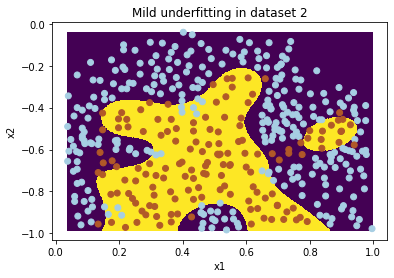

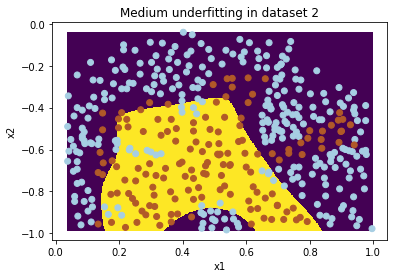

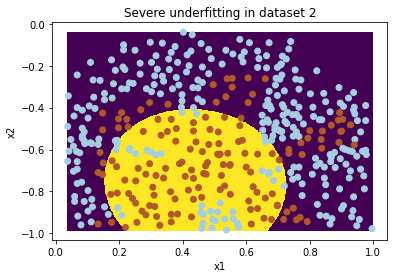

In [7]:
libsvm_param.run_gaussian(c=10**2, gamma=10, fig_name="Mild underfitting in dataset 2", dataset="Datasets/csv/dataset2.csv")
libsvm_param.run_gaussian(c=10, gamma=10, fig_name="Medium underfitting in dataset 2", dataset="Datasets/csv/dataset2.csv")
libsvm_param.run_gaussian(c=10, gamma=1, fig_name="Severe underfitting in dataset 2", dataset="Datasets/csv/dataset2.csv")

## Question 6: Is dataset 3 linearly separable? Are there any outliers?

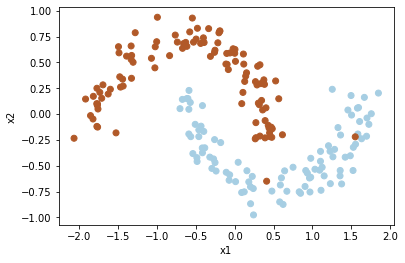

In [8]:
libsvm_param.show_data('Datasets/csv/dataset3.csv')

The data is not linearly separable, it is easy to see the 2 outliers, as they are red points in the middle of the blue ones

## Question 7:  Run a non-linear SVM and get the best values for C and $\gamma$

We run again the code that tests all the configurations, and find that the best fit is obtained with the parameters C $=1$ and $\gamma=1$.

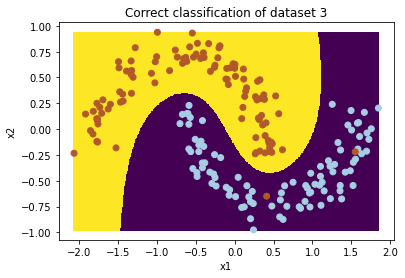

In [9]:
libsvm_param.run_gaussian(c=1, gamma=1, dataset='Datasets/csv/dataset3.csv', fig_name="Correct classification of dataset 3")

As before, we can select some cases of mild(C $=10^2$, $\gamma=10$), moderate(C $=10^3$, $\gamma=10$) and severe(C $=10^3$, $\gamma=10^3$) overfitting.

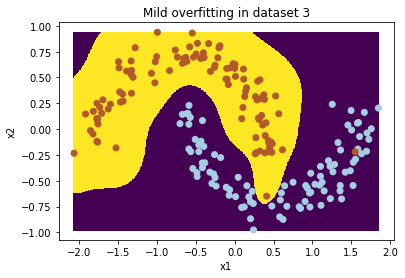

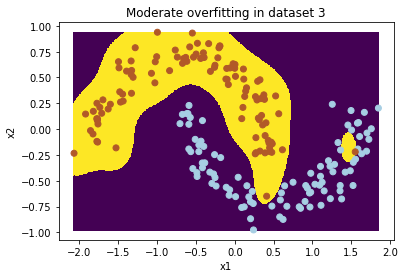

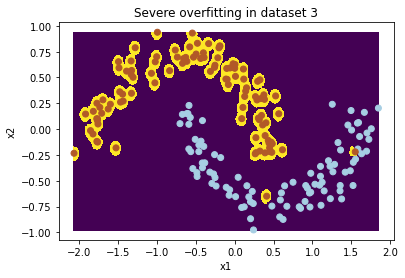

In [10]:
libsvm_param.run_gaussian(c=10**2, gamma=10, fig_name="Mild overfitting in dataset 3", dataset="Datasets/csv/dataset3.csv")
libsvm_param.run_gaussian(c=10**3, gamma=10, fig_name="Moderate overfitting in dataset 3", dataset="Datasets/csv/dataset3.csv")
libsvm_param.run_gaussian(c=10**3, gamma=10**3, fig_name="Severe overfitting in dataset 3", dataset="Datasets/csv/dataset3.csv")

We can do the same for underfitting cases, where we will visualize two of them, mild(C $=10$, $\gamma=10^-1$) and severe(C $=1$, $\gamma=10^-1$)

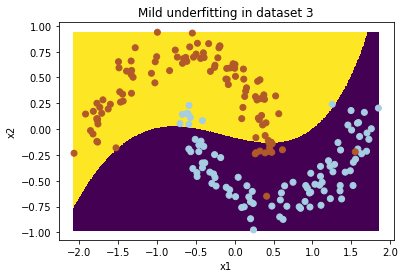

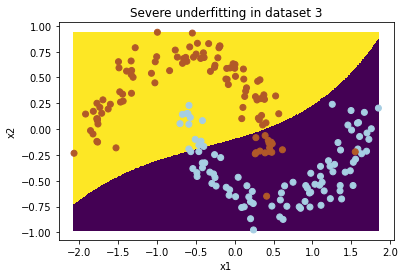

In [11]:
libsvm_param.run_gaussian(c=10, gamma=10**-1, fig_name="Mild underfitting in dataset 3", dataset="Datasets/csv/dataset3.csv")
libsvm_param.run_gaussian(c=1, gamma=10**-1, fig_name="Severe underfitting in dataset 3", dataset="Datasets/csv/dataset3.csv")


## Question 8: Make a full training and prediction proccess using dataset3

### Reading the data

In [12]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, model_selection, svm

dataset3='Datasets/csv/dataset3.csv'

data = pd.read_csv(dataset3, header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

### Making the split and scaling

We will use `1` as the seed at first

In [13]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=1)

scaler = preprocessing.StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Training with all possible configurations
We will generate a list of all the configurations and iterate over it, doing the training process and saving the accuracy in another list. After that, we can check the index of the best accuracy and select that configuration.

In [14]:
configs = [(c_exp,g_exp) for c_exp in range(-2,5) for g_exp in range(-2,5)]
acc_linear = [] 
acc_gaussian = []
for c_exp, g_exp in configs:
    linear_model = svm.SVC(kernel='linear', C=10**c_exp)
    rbf_model = svm.SVC(C=10**c_exp, gamma=10**g_exp)

    linear_model.fit(X_train, y_train)
    rbf_model.fit(X_train, y_train)
    
    acc_linear.append(linear_model.score(X_test, y_test))
    acc_gaussian.append(rbf_model.score(X_test, y_test))
    
best_linear_config = configs[np.argmax(acc_linear)]
best_linear_score = acc_linear[np.argmax(acc_linear)]

best_gaussian_config = configs[np.argmax(acc_gaussian)]
best_gaussian_score = acc_gaussian[np.argmax(acc_gaussian)]

print(f"Best linear configuration: C=10^{best_linear_config[0]} - Score: {best_linear_score}")
print(f"Best gaussian configuration: C=10^{best_gaussian_config[0]}, gamma=10^{best_gaussian_config[1]} - Score: {best_gaussian_score}")

Best linear configuration: C=10^1 - Score: 0.9019607843137255
Best gaussian configuration: C=10^0, gamma=10^0 - Score: 1.0


To test it with different seeds, we can parametrize it and make another function, `split_and_train`.

In [15]:
libsvm_param.split_and_train(dataset3, 5)

Best linear configuration: C=10^-1 - Score: Train->86.09271523178808%	Test ->86.27450980392157%
Best gaussian configuration: C=10^-1, gamma=10^1 - Score: Train->98.67549668874173%	Test->100.0%


In [16]:
libsvm_param.split_and_train(dataset3, 14)

Best linear configuration: C=10^-1 - Score: Train->86.09271523178808%	Test ->82.35294117647058%
Best gaussian configuration: C=10^0, gamma=10^0 - Score: Train->99.33774834437085%	Test->98.0392156862745%


In [17]:
libsvm_param.split_and_train(dataset3, 35)

Best linear configuration: C=10^-2 - Score: Train->80.79470198675497%	Test ->96.07843137254902%
Best gaussian configuration: C=10^-1, gamma=10^0 - Score: Train->98.01324503311258%	Test->100.0%


With this examples we can appreciate how sensitive the model is to changes in the training set, resulting in different parameters for each seed.

## Question 9: Parameter optimization using GridSearchCV

In [18]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import GridSearchCV, train_test_split

dataset3='Datasets/csv/dataset3.csv'

data = pd.read_csv(dataset3, header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=35)

scaler = preprocessing.StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_model = svm.SVC()

Cs = np.logspace(-4, 4, num=9, base=10)
Gs = np.logspace(-4, 4, num=9, base=10)

optimal=GridSearchCV(estimator=svm_model, param_grid=dict(C=Cs,gamma=Gs), n_jobs=2, cv=5)

optimal.fit(X_train, y_train)


chosen_c=optimal.best_estimator_.C
chosen_gamma=optimal.best_estimator_.gamma

print(f"Best estimator: C={chosen_c}, gamma={chosen_gamma}")

print(f"Accuracy: Train->{optimal.score(X_train, y_train)*100}% Test->{optimal.score(X_test, y_test)*100}%")


Best estimator: C=1.0, gamma=1.0
Accuracy: Train->98.67549668874173% Test->100.0%


For the chosen seed (`35`), we can see that the parameters change a bit, but the accuracy is practically the same. This method has the advantage of being simpler and performing cross-validation automatically.

## Question 10: Drawbacks of doing the optimization manually using the test set

First of all, we are using the test set to choose the better model, which makes it less valuable in terms of information, and makes the model worst at generalizing with new data. Furthermore, adjusting the parameters by hand it is easier to leave out a better configuration.

## Question 11: Implement K-fold nested cross validation without GridSearchCV

In [19]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import StratifiedKFold, train_test_split

dataset3='Datasets/csv/dataset3.csv'

data = pd.read_csv(dataset3, header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=35)

scaler = preprocessing.StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

kfold = StratifiedKFold(n_splits=5, shuffle=True)

folds = list(zip(*[fold for fold in kfold.split(X_train, y_train)]))

train_sets, test_sets = folds[0], folds[1]

Cs = np.logspace(-4, 4, num=9, base=10)
Gs = np.logspace(-4, 4, num=9, base=10)

average_scores = np.zeros((len(Cs),len(Gs)))

for c_index, C in enumerate(Cs):
    for g_index, gamma in enumerate(Gs): #Outer loop 
        for train_set, test_set in zip(train_sets, test_sets): #Inner loop
            model = svm.SVC(C=C, gamma=gamma)
            model.fit([X_train[i] for i in train_set], [y_train[i] for i in train_set])
            
            average_scores[c_index, g_index] += model.score([X_train[i] for i in test_set], [y_train[i] for i in test_set])
        average_scores[c_index, g_index] /= 5

best_config = np.unravel_index(np.argmax(average_scores), average_scores.shape)

best_c = Cs[best_config[0]]
best_gamma = Gs[best_config[1]]

best_score = average_scores[best_config[0], best_config[1]]

print(f"Best configuration => C={best_c}, gamma={best_gamma}.\nTrain accuracy = {best_score*100}%")

model = svm.SVC(C=best_c, gamma=best_gamma)
model.fit(X_train, y_train)

print(f"Test accuracy = {model.score(X_test, y_test)*100}%")

Best configuration => C=1.0, gamma=1.0.
Train accuracy = 98.68817204301075%
Test accuracy = 100.0%


 We get the same parameters as we did when using GridSearchCV, although there are a few other combinations that give the maximum accuracy.

## Question 12: Applying the script from question 9 to the noMNIST dataset

Again, we parametrize the script and add it to the `libsvm_param` file. We can then run it with the new dataset:

In [20]:
libsvm_param.cross_validation_search('Datasets/csv/train_nomnist.csv', 'Datasets/csv/test_nomnist.csv')

Best estimator: C=10.0, gamma=0.0001
Accuracy: Train->94.11111111111111% Test->89.66666666666666%


## Question 13: Measure time used with K=3, K=5 and K=10

We will use the `timeit` module to measure de computational time. We'll also add a parameter to the `cross_validation_search` to control the number of folds (parameter `cv` in the GridSearchCV.) We could also pass a different set of values for C or $\gamma$.

In [33]:
import timeit

for x in [3, 5, 10]:
    print(timeit.timeit(f"import libsvm_param;libsvm_param.cross_validation_search('Datasets/csv/train_nomnist.csv', 'Datasets/csv/test_nomnist.csv', folds={x})", number=1), " seconds")
    

Best estimator: C=10.0, gamma=0.0001
Accuracy: Train->94.11111111111111% Test->89.66666666666666%
63.863056184000015  seconds
Best estimator: C=10.0, gamma=0.0001
Accuracy: Train->94.11111111111111% Test->89.66666666666666%
125.51917210600004  seconds
Best estimator: C=10.0, gamma=0.0001
Accuracy: Train->94.11111111111111% Test->89.66666666666666%
259.35324355899957  seconds


We can see that the execution times are around 1 minute for K $=3$, around 2 for K $=5$ and around 4 for K $=10$. This is understandable, as the number of trainings is proportional to the number of folds, and their execution times are extremely similar.

In this case, the accuracy does not improve with the number of folds, so the 3-fold is a good option, as it saves computational time.

## Question 14: Train a linear model for the spam dataset and get the best value for C

We implement a function similar to the one in question 9, that instead of using a gaussian kernel, uses a linear one. W can call it and obtain the best value for the parameter.

In [140]:
libsvm_param.cross_validation_search_linear('Datasets/csv/train_spam.csv', 'Datasets/csv/test_spam.csv', folds=3, c_vals=[.001, .01, .1, 1, 10])

Best estimator: C=0.01
Accuracy: Train->99.97500000000001% Test->98.3%


## Question 15: Construct the confusion matrix and analize the misclassified patterns

Now we read the datasets (there is no need to scale, as they contain only binary data)

In [53]:
train_data = pd.read_csv('Datasets/csv/train_spam.csv', header=None)
test_data = pd.read_csv('Datasets/csv/test_spam.csv', header=None)

X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values

X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values


We can now train a model with C $=0.01$ and construct the confusion matrix. We need the `sklearn.metrics` module.

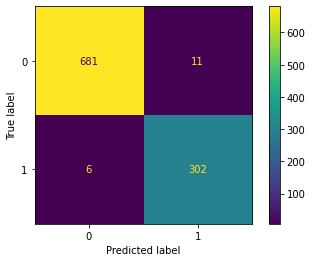

In [46]:
from sklearn.metrics import plot_confusion_matrix
model = svm.SVC(kernel='linear', C=0.01)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plot_confusion_matrix(model, X_test, y_test)

There are 11 safe emails classified as spam and 6 spam emails classified as safe. We will check which words are in them.

In [126]:

false_positives=[pattern for i, pattern in enumerate(X_test) if (y_pred[i]==1 and y_test[i]==0)]
words_in_fp = np.zeros((1899,))

for pattern in false_positives:
    words = np.where(pattern)[0]
    for word in words:
        words_in_fp[word] += 1
        
flagged_words = np.where(words_in_fp > 9)[0]

vocab = pd.read_csv('vocab.txt', delimiter='\t', dtype='str', usecols=[1])
vocab = vocab.iloc[:,:].values

for flagged in flagged_words:
    print(vocab[flagged])

['analysi']
['ani']
['island']
['numbera']
['off']
['onc']
['thei']
['thing']
['todai']


Extracting the words that are in at least 10 of the 11  false positives, whe can conclude that some of them are likely responsible for the misclassification, for example, 'island', which is not a normal term to include in a mail, 'off' which normally appears when talking about offers, or 'onc'(once) and 'todai', which are also common in spam. We could also compare their frequencies in positive patterns and in the whole dataset, to see which ones are actually more frequent in spam mails. 

## Question 16: Train an RBF model

We run the script from assignment 3 (`rbf.py`) and determine that the best seed is 3. To show its result, we create a modified version that has no CLI and runs only a fixed seed. We call it with the default arguments:

In [138]:
import rbf_1_seed

rbf_1_seed.train_rbf_total(
    'Datasets/csv/train_spam.csv', 'Datasets/csv/test_spam.csv', classification=True,
    ratio_rbf=.1, l2=False, eta=1e-2, outputs=1, model="", pred=False)

-----------
Seed: 3
-----------
Number of RBFs used: 400
******************
Summary of results
******************
Training MSE: 0.005500 +- 0.000000
Test MSE: 0.013000 +- 0.000000
Training CCR: 99.45% +- 0.00%
Test CCR: 98.70% +- 0.00%


We get a test CCR slightly higher than with the SVM while the training CCR is a bit lower. This means that the RBF is generalising better, but the difference is negictible, and SVM has less meta-parameters to tune (C and $\gamma$, while an RBF network has the number of RBF neurons, the regularization type and $\eta$).

## Question 17: Train a non-linear SVM

We can use again the `cross_validation_search` function to find the best parameters. We will run it with values of C $\in\{0.01, 0.1, 1, 10, 100\}$ and of $\gamma\in\{0.01, 0.1, 1, 10, 100\}$:

In [147]:
Cs = np.logspace(-2, 2, 5)
Gs = np.logspace(-2, 2, 5)

libsvm_param.cross_validation_search('Datasets/csv/train_spam.csv', 'Datasets/csv/test_spam.csv', c_vals=Cs, gamma_vals=Gs)

Best estimator: C=10.0, gamma=0.01
Accuracy: Train->99.97500000000001% Test->83.0%


The non-linear classifier has and even higher CCR on the training set, but a much worse performance on the test set, suggesting that it suffers from overfitting even with the largest radius. We allow smaller values of $\gamma$ to try to avoid it.

In [148]:
Cs = np.logspace(-2, 2, 5)
Gs = np.logspace(-4, 0, 5)

libsvm_param.cross_validation_search('Datasets/csv/train_spam.csv', 'Datasets/csv/test_spam.csv', c_vals=Cs, gamma_vals=Gs)

Best estimator: C=10.0, gamma=0.0001
Accuracy: Train->99.55000000000001% Test->98.7%


Now we get the same test result as with the RBF network, with a slight increase in training accuracy.